In [1]:
import pickle
import numpy as np
from matplotlib import pyplot as plt

In [2]:
with open('embeddings_all_l0.9.pkl', 'rb') as file:
    data = pickle.load(file)

x = data["outputs"].cpu().numpy()
y = data["labels"].cpu().numpy()
print(y.shape)

(49984,)


In [3]:
embeddings = np.array(x)

In [4]:
# compute the centroid for each class
centroids = []
labels = []
for i in range(100):
    centroids.append(np.mean(embeddings[y == i], axis=0))
    labels.append(i)

print(len(centroids))
print(labels)

100
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [5]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment

def get_even_clusters(X, cluster_size):
    n_clusters = int(np.ceil(len(X)/cluster_size))
    kmeans = KMeans(n_clusters)
    kmeans.fit(X)
    centers = kmeans.cluster_centers_
    centers = centers.reshape(-1, 1, X.shape[-1]).repeat(cluster_size, 1).reshape(-1, X.shape[-1])
    distance_matrix = cdist(X, centers)
    clusters = linear_sum_assignment(distance_matrix)[1]//cluster_size
    return clusters

In [6]:
centroids = np.array(centroids)
clusters = get_even_clusters(centroids, 10)

/Users/sebastiancavada/anaconda3/envs/ai701/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [7]:
print(clusters.shape)
print(clusters)
print(np.unique(clusters, return_counts=True))

(100,)
[6 0 2 9 1 5 8 8 2 6 6 2 7 7 0 9 6 7 8 9 5 2 6 4 8 5 8 1 6 3 4 3 2 3 9 2 2
 7 9 5 6 0 9 9 8 8 2 3 7 4 1 3 3 6 0 1 3 6 7 3 4 6 0 3 1 2 9 1 4 4 0 4 1 4
 1 0 4 8 8 8 1 7 0 0 5 7 5 5 9 7 7 5 0 1 5 4 3 9 2 5]
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10]))


In [8]:
reverse = {}
for i, x in enumerate(clusters):
    reverse[i] = clusters[i]

print(reverse)

{0: 6, 1: 0, 2: 2, 3: 9, 4: 1, 5: 5, 6: 8, 7: 8, 8: 2, 9: 6, 10: 6, 11: 2, 12: 7, 13: 7, 14: 0, 15: 9, 16: 6, 17: 7, 18: 8, 19: 9, 20: 5, 21: 2, 22: 6, 23: 4, 24: 8, 25: 5, 26: 8, 27: 1, 28: 6, 29: 3, 30: 4, 31: 3, 32: 2, 33: 3, 34: 9, 35: 2, 36: 2, 37: 7, 38: 9, 39: 5, 40: 6, 41: 0, 42: 9, 43: 9, 44: 8, 45: 8, 46: 2, 47: 3, 48: 7, 49: 4, 50: 1, 51: 3, 52: 3, 53: 6, 54: 0, 55: 1, 56: 3, 57: 6, 58: 7, 59: 3, 60: 4, 61: 6, 62: 0, 63: 3, 64: 1, 65: 2, 66: 9, 67: 1, 68: 4, 69: 4, 70: 0, 71: 4, 72: 1, 73: 4, 74: 1, 75: 0, 76: 4, 77: 8, 78: 8, 79: 8, 80: 1, 81: 7, 82: 0, 83: 0, 84: 5, 85: 7, 86: 5, 87: 5, 88: 9, 89: 7, 90: 7, 91: 5, 92: 0, 93: 1, 94: 5, 95: 4, 96: 3, 97: 9, 98: 2, 99: 5}


[10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
0.1041933418693982


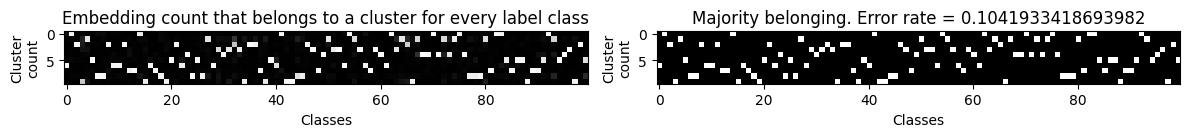

In [9]:
def plot_stuff(embeddings, y):
    # Your data and operations here
    a = np.zeros((10,100))

    for i, x in enumerate(embeddings):
        distances = np.linalg.norm(centroids - x, axis=1)
        first_index = np.argsort(distances)[0]    
        a[reverse[first_index]][y[i]] += 1
        
    ## majority voting for each class
    b = np.argmax(a, axis=0)

    c = np.zeros((10,100))
    for x in range(100):    
        c[b[x]][x] = 1

    print(np.sum(c, axis=1))

    false_negative = np.ma.array(a,mask=c)
    sum_fn = np.sum(false_negative)
    print(sum_fn/y.shape[0])

    # Start by creating a figure
    plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

    # First subplot
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
    plt.xlabel("Classes")
    plt.ylabel("Cluster\ncount")
    plt.title("Embedding count that belongs to a cluster for every label class")
    plt.imshow(a, cmap='Greys_r')

    # Second subplot
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
    plt.xlabel("Classes")
    plt.ylabel("Cluster\ncount")
    plt.title("Majority belonging. Error rate = " + str(sum_fn/y.shape[0]))
    plt.imshow(c, cmap='Greys_r')

    # Display the figure
    plt.tight_layout()  # This adjusts subplots to fit into the figure area.
    plt.show()

plot_stuff(embeddings, y)

In [10]:
with open('embeddings_all_l0.9_test.pkl', 'rb') as file:
    data = pickle.load(file)

x_test = data["outputs"].cpu().numpy()
y_test = data["labels"].cpu().numpy()
print(x_test.shape)
print(y_test.shape)

embeddings_test = np.array(x_test)
y_test = np.array(y_test)

(10000, 344)
(10000,)


[10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
0.1674


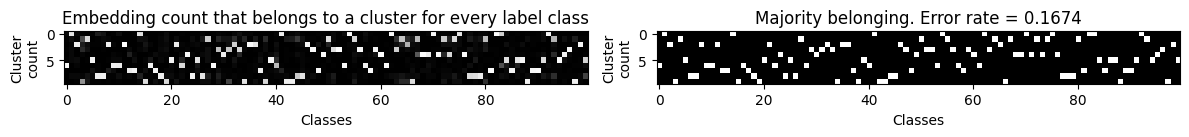

In [11]:
plot_stuff(embeddings_test, y_test)

In [12]:
n = np.zeros((10,10))

for i in range(10):
    n[i] = np.arange(100)[clusters==i]
print(n)

[[ 1. 14. 41. 54. 62. 70. 75. 82. 83. 92.]
 [ 4. 27. 50. 55. 64. 67. 72. 74. 80. 93.]
 [ 2.  8. 11. 21. 32. 35. 36. 46. 65. 98.]
 [29. 31. 33. 47. 51. 52. 56. 59. 63. 96.]
 [23. 30. 49. 60. 68. 69. 71. 73. 76. 95.]
 [ 5. 20. 25. 39. 84. 86. 87. 91. 94. 99.]
 [ 0.  9. 10. 16. 22. 28. 40. 53. 57. 61.]
 [12. 13. 17. 37. 48. 58. 81. 85. 89. 90.]
 [ 6.  7. 18. 24. 26. 44. 45. 77. 78. 79.]
 [ 3. 15. 19. 34. 38. 42. 43. 66. 88. 97.]]


In [18]:
embeddings_child = [[] for x in range(10)]
labels_child = [[] for x in range(10)]

for i, x in enumerate(embeddings_test):
    # for j in range(10):

    distances = np.linalg.norm(centroids - x, axis=1)
    first_index = np.argsort(distances)[0]        

    # find element in matrix n

    res = np.where(n == first_index)
    #print(res[0][0])

    #print(embeddings_child)

    embeddings_child[res[0][0]].append(x)
    labels_child[res[0][0]].append(y_test[i])

    # if(first_index in n):
    #     print(first_index, y_test[i])
    #     embeddings_child.append(x)
    #     labels_child.append(y_test[i])

In [20]:
print(len(labels_child[0]))

977


In [26]:
print(np.unique(np.array(labels_child[8]), return_counts=True))

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 18, 19,
       20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 54, 55, 56, 57, 59,
       61, 62, 63, 64, 65, 66, 67, 69, 70, 72, 73, 74, 75, 77, 78, 79, 80,
       82, 83, 84, 86, 88, 89, 91, 92, 93, 94, 95, 96, 97, 98, 99]), array([ 3,  3,  2,  6,  2, 85, 87,  1,  1,  5,  1,  2, 11,  1,  1, 86,  4,
        4,  1,  3, 89,  1, 81, 10,  1, 10,  2,  1,  2,  1,  1,  1,  1,  2,
        1,  2,  2,  3,  1, 67, 78,  1,  4,  1,  3,  9,  1,  4,  1,  2,  1,
        2,  4,  5,  7,  4,  3,  4,  2,  2,  3,  3,  8,  2, 75, 77, 85,  4,
        1,  5,  3,  3,  3,  2,  8,  4, 15,  1,  1,  1,  1,  2, 20]))


In [30]:
centroids_child = [[] for x in range(10)]

for i in range(10):

    np_index = np.array(n[i], dtype=int)

    print(np.array(n[i]))
    centroids_np = np.array(centroids)

    centroids_child = centroids_np[np_index]

print(centroids_child.shape)

[ 1. 14. 41. 54. 62. 70. 75. 82. 83. 92.]
[ 4. 27. 50. 55. 64. 67. 72. 74. 80. 93.]
[ 2.  8. 11. 21. 32. 35. 36. 46. 65. 98.]
[29. 31. 33. 47. 51. 52. 56. 59. 63. 96.]
[23. 30. 49. 60. 68. 69. 71. 73. 76. 95.]
[ 5. 20. 25. 39. 84. 86. 87. 91. 94. 99.]
[ 0.  9. 10. 16. 22. 28. 40. 53. 57. 61.]
[12. 13. 17. 37. 48. 58. 81. 85. 89. 90.]
[ 6.  7. 18. 24. 26. 44. 45. 77. 78. 79.]
[ 3. 15. 19. 34. 38. 42. 43. 66. 88. 97.]
(10, 344)


In [31]:
print(n)

[[ 1. 14. 41. 54. 62. 70. 75. 82. 83. 92.]
 [ 4. 27. 50. 55. 64. 67. 72. 74. 80. 93.]
 [ 2.  8. 11. 21. 32. 35. 36. 46. 65. 98.]
 [29. 31. 33. 47. 51. 52. 56. 59. 63. 96.]
 [23. 30. 49. 60. 68. 69. 71. 73. 76. 95.]
 [ 5. 20. 25. 39. 84. 86. 87. 91. 94. 99.]
 [ 0.  9. 10. 16. 22. 28. 40. 53. 57. 61.]
 [12. 13. 17. 37. 48. 58. 81. 85. 89. 90.]
 [ 6.  7. 18. 24. 26. 44. 45. 77. 78. 79.]
 [ 3. 15. 19. 34. 38. 42. 43. 66. 88. 97.]]


In [34]:
curr_mapping = {}

for j in range(10):
    for i, x in enumerate(n[j]):
        curr_mapping[int(x)] = i

print(curr_mapping)

{1: 0, 14: 1, 41: 2, 54: 3, 62: 4, 70: 5, 75: 6, 82: 7, 83: 8, 92: 9, 4: 0, 27: 1, 50: 2, 55: 3, 64: 4, 67: 5, 72: 6, 74: 7, 80: 8, 93: 9, 2: 0, 8: 1, 11: 2, 21: 3, 32: 4, 35: 5, 36: 6, 46: 7, 65: 8, 98: 9, 29: 0, 31: 1, 33: 2, 47: 3, 51: 4, 52: 5, 56: 6, 59: 7, 63: 8, 96: 9, 23: 0, 30: 1, 49: 2, 60: 3, 68: 4, 69: 5, 71: 6, 73: 7, 76: 8, 95: 9, 5: 0, 20: 1, 25: 2, 39: 3, 84: 4, 86: 5, 87: 6, 91: 7, 94: 8, 99: 9, 0: 0, 9: 1, 10: 2, 16: 3, 22: 4, 28: 5, 40: 6, 53: 7, 57: 8, 61: 9, 12: 0, 13: 1, 17: 2, 37: 3, 48: 4, 58: 5, 81: 6, 85: 7, 89: 8, 90: 9, 6: 0, 7: 1, 18: 2, 24: 3, 26: 4, 44: 5, 45: 6, 77: 7, 78: 8, 79: 9, 3: 0, 15: 1, 19: 2, 34: 3, 38: 4, 42: 5, 43: 6, 66: 7, 88: 8, 97: 9}


In [35]:
at = np.zeros((10,101))

for i, x in enumerate(embeddings_child):

    # get distance from centroids

    distances_father = np.linalg.norm(centroids - x, axis=1)
    first_index_father = np.argsort(distances_father)[0]

    distances = np.linalg.norm(centroids_child[first_index_father] - x, axis=1)
    predicted = np.argsort(distances)[0]
    real = labels_child[i]   
    print(real, predicted) 
    if(real not in n):
        real_mapped = 100
    else:
        real_mapped = curr_mapping[real]    

    at[predicted][real_mapped] += 1



ValueError: operands could not be broadcast together with shapes (10,344) (977,344) 

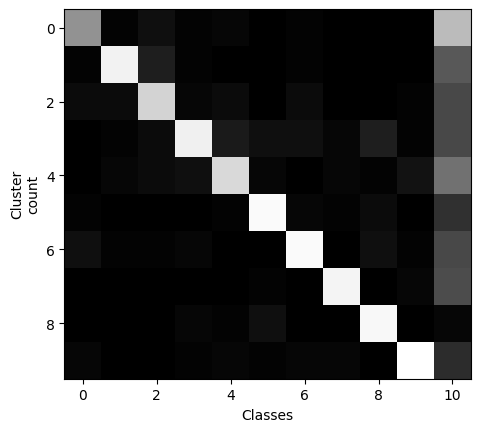

In [54]:
plt.xlabel("Classes")
plt.ylabel("Cluster\ncount")
#plt.title("Embedding count that belongs to a cluster for every label class number of clustering = " + str(centroids.shape[0]))
plt.imshow(at,cmap='Greys_r')

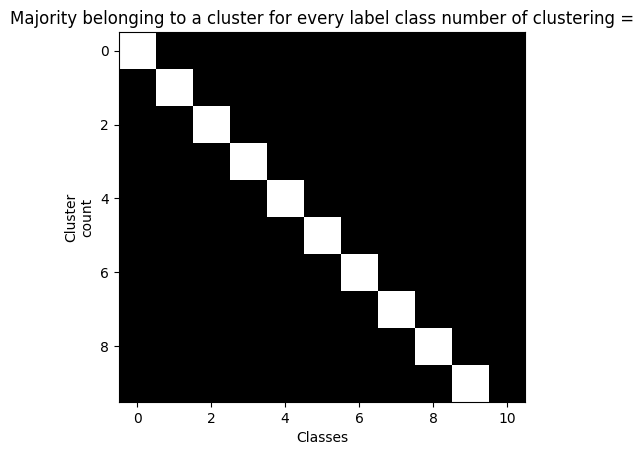

In [55]:
## majority voting for each class
bt = np.argmax(at, axis=0)

ct = np.zeros((10,11))
for x in range(10):    
    ct[bt[x]][x] = 1

plt.xlabel("Classes")
plt.ylabel("Cluster\ncount")
plt.title("Majority belonging to a cluster for every label class number of clustering =")
plt.imshow(ct, cmap='Greys_r')

In [56]:
np.sum(ct, axis=1)
print(len(embeddings_child))
false_negative = np.ma.array(at,mask=ct)
sum_fn = np.sum(false_negative)
print(sum_fn/len(embeddings_child))

962
0.32744282744282743
